In [1]:
# general
import pandas as pd
from pydataset import data

# vis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# model
from sklearn.cluster import KMeans

Use the iris dataset.

Perform clustering with sepal length, sepal width, and petal length.

Use a k of 4.

Create a 3d visualization that shows your clusters along with the features specified above?

Is 4 the optimal number? Try different values of k and visualize your results.

In [50]:
iris = data('iris')
iris.columns = [c.lower().replace('.', '_') for c in iris]

In [51]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


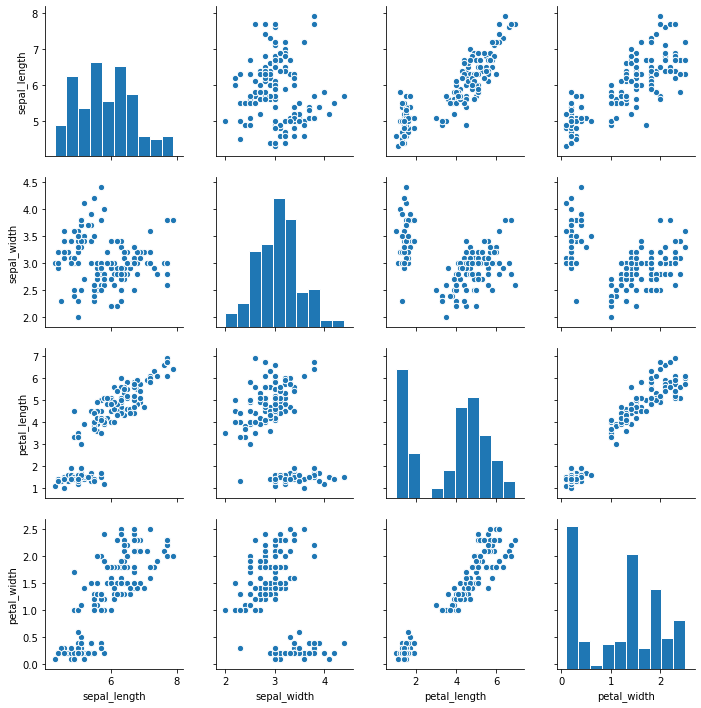

In [57]:
g = sns.PairGrid(iris)
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)

Text(0, 0.5, 'inertia')

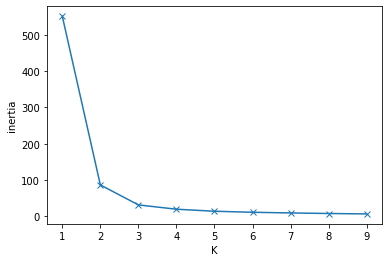

In [78]:
iris_subset = iris[['petal_length', 'petal_width']]

k_values = []
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(iris_subset)
    inertias.append(kmeans.inertia_)
    k_values.append(k)

plt.plot(k_values, inertias, marker='x')
plt.xlabel('K')
plt.ylabel('inertia')

In [72]:
X = iris[['sepal_length', 'petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[5.006      1.462      0.246     ]
 [6.9125     5.846875   2.13125   ]
 [5.53214286 3.96071429 1.22857143]
 [6.2525     4.815      1.625     ]]


In [73]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,sepal_length,petal_length,petal_width
0,5.006000,1.462000,0.246000
1,6.912500,5.846875,2.131250
2,5.532143,3.960714,1.228571
3,6.252500,4.815000,1.625000


[Text(0.5, 0, 'petal_width'),
 Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_length')]

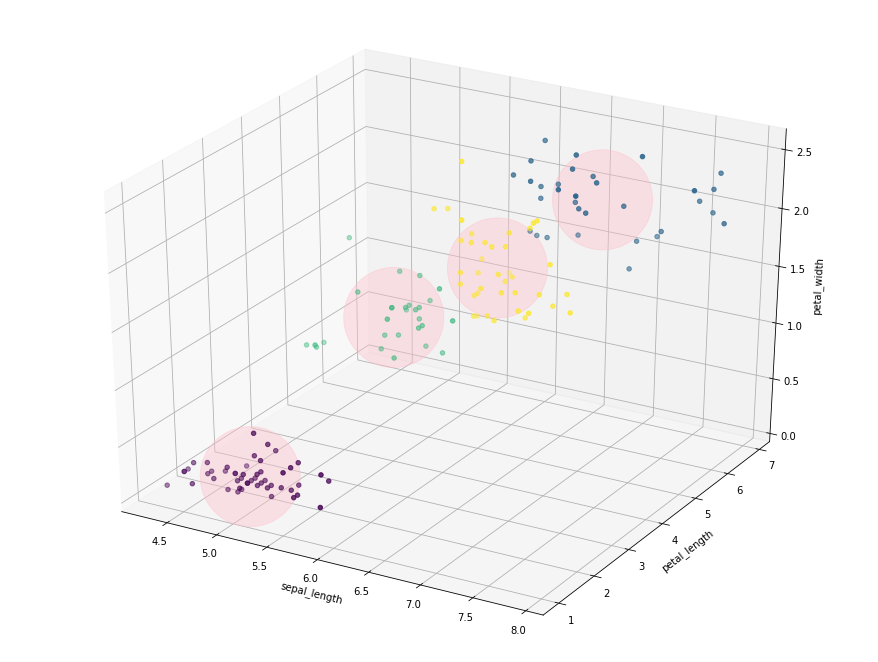

In [74]:
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(iris.sepal_length, iris.petal_length, iris.petal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_length, centers.petal_length, centers.petal_width, c='pink', s=10000, alpha=.4)
ax.set(xlabel='sepal_length', ylabel='petal_length', zlabel='petal_width')

In [75]:
X = iris[['sepal_length', 'petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[5.276      1.52       0.292     ]
 [5.9875     5.01875    1.80625   ]
 [7.475      6.3        2.05      ]
 [5.53214286 3.96071429 1.22857143]
 [6.56086957 5.52608696 2.15217391]
 [6.42380952 4.6047619  1.43809524]
 [4.736      1.404      0.2       ]]


In [76]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

[Text(0.5, 0, 'petal_width'),
 Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_length')]

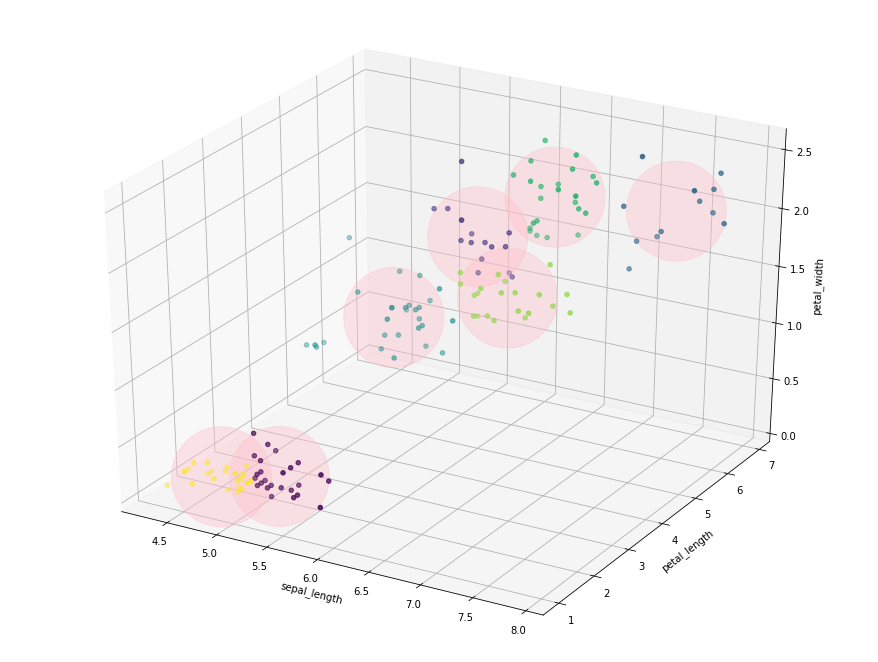

In [77]:
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(iris.sepal_length, iris.petal_length, iris.petal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_length, centers.petal_length, centers.petal_width, c='pink', s=10000, alpha=.4)
ax.set(xlabel='sepal_length', ylabel='petal_length', zlabel='petal_width')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


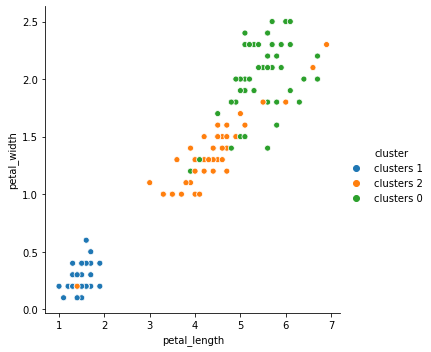

In [63]:
X = iris[['petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

X['cluster'] = 'clusters ' + pd.Series(kmeans.predict(X)).astype(str)

sns.relplot(data=X, hue='cluster', x='petal_length', y='petal_width')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


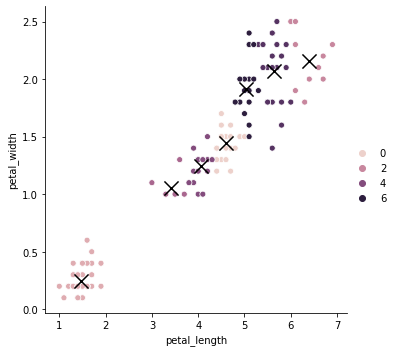

In [70]:
X = iris[['petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=7)
kmeans.fit(X)

X['cluster'] = 'clusters ' + pd.Series(kmeans.predict(X)).astype(str)

sns.relplot(data=X, hue=kmeans.labels_, x='petal_length', y='petal_width')
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black')

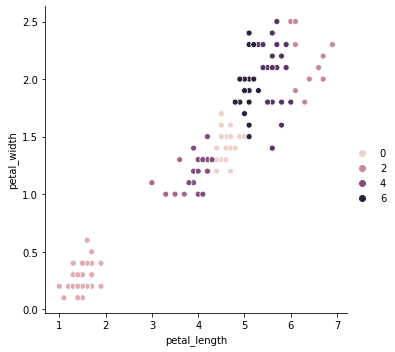

In [71]:
sns.relplot(data=iris, hue=kmeans.labels_, x='petal_length', y='petal_width')

In [2]:
import env
import acquire

Use the mall dataset.

Perform clustering using annual income and spending score. 

Try out different values for k.

Use the resulting clusters to explore your data. What is the center point for each cluster in terms of annual income and spending score? What is the average age for each cluster?

Create a 3d plot with annual income, spending score, and age. Use color to distinguish the clusters you have created.

In [3]:
mall = acquire.get_mall_data()

In [4]:
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [ ]:
mall = mall.drop(columns=['customer_id', 'gender'])

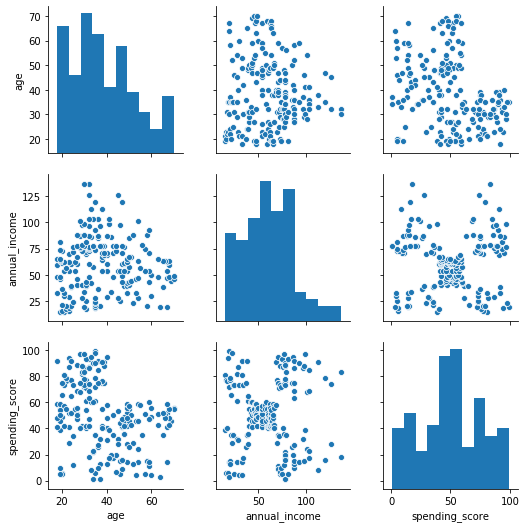

In [12]:
sns.pairplot(mall)

In [13]:
input_features = ['spending_score', 'annual_income']

ks = []
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(mall[input_features])
    ks.append(k)
    inertias.append(kmeans.inertia_)
    
df = pd.DataFrame(dict(k=ks, inertia=inertias))

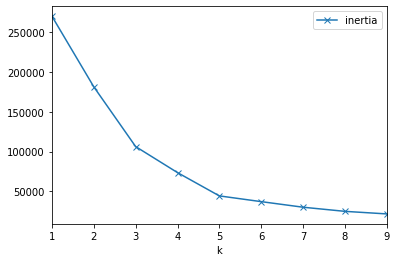

In [14]:
df.plot(y='inertia', x='k', marker='x')

In [15]:
# compare inertia to previous inertia
df['delta_inertia'] = df.inertia.diff()
df

,k,inertia,delta_inertia
0,1,269981.280000,NaN
1,2,181363.595960,-88617.684040
2,3,106348.373062,-75015.222897
3,4,73679.789039,-32668.584023
4,5,44448.455448,-29231.333592
5,6,37233.814511,-7214.640937
6,7,30227.606513,-7006.207998
7,8,25043.890043,-5183.716470
8,9,21818.114588,-3225.775455


In [17]:
kmeans = KMeans(n_clusters=5).fit(mall[input_features])

mall['cluster'] = kmeans.labels_
mall.head()

,age,annual_income,spending_score,cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


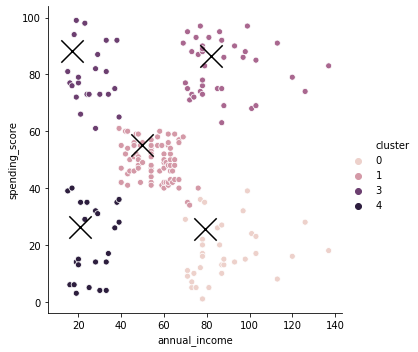

In [19]:
sns.relplot(data=mall, y='spending_score', x='annual_income', hue='cluster')
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='x', s=500, c='black')

In [20]:
mall.groupby('cluster').mean()

,age,annual_income,spending_score
cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [37]:
X = mall[['annual_income', 'spending_score', 'age']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

print(kmeans.cluster_centers_)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

[[48.70526316 42.63157895 44.89473684]
 [86.53846154 82.12820513 32.69230769]
 [87.         18.63157895 40.39473684]
 [28.71428571 74.25       24.82142857]]


[Text(0.5, 0, 'age'),
 Text(0.5, 0, 'spending_score'),
 Text(0.5, 0, 'annual_income')]

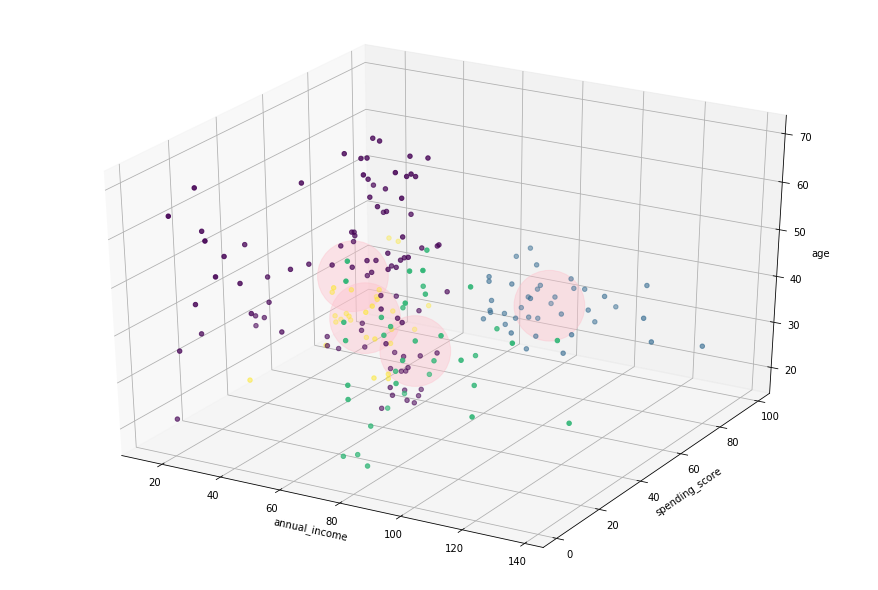

In [38]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

ax.scatter(mall.annual_income, mall.spending_score, mall.age, c=kmeans.labels_)
ax.scatter(centers.annual_income, centers.spending_score, centers.age, c='pink', s=5000, alpha=.4)
ax.set(xlabel='annual_income', ylabel='spending_score', zlabel='age')

Load the tips dataset

Perform k-means clustering with tip and total_bill. 

Try a k of 2 and a k of 3. Visualize the resulting clusters.

Create a 3d visualization of tip, total bill, and party size. 

Use color to indicate the clusters you have created.

Use the resulting clusters to explore your dataset. 

What is the average party size for each cluster? How many smokers vs non smokers are in each cluster? 

Is this different than in the overall population?

In [2]:
df_tip = data("tips")

In [3]:
df_tip.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [75]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [76]:
df_tip.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

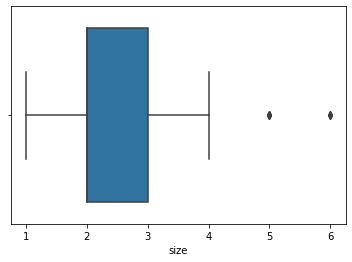

In [83]:
sns.boxplot('size', data = df_tip)

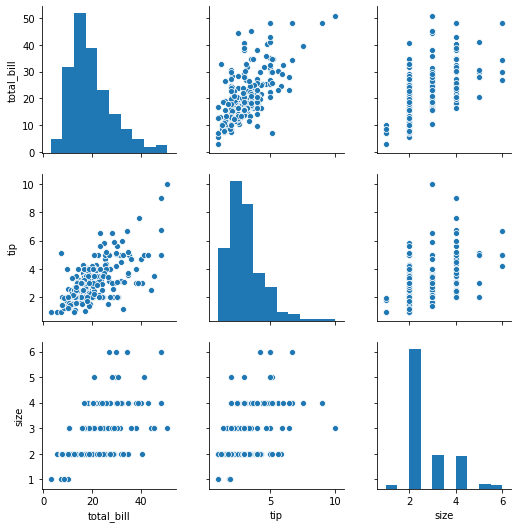

In [84]:
sns.pairplot(df_tip)

In [4]:
input_features = ['tip', 'total_bill']

ks = []
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(df_tip[input_features])
    ks.append(k)
    inertias.append(kmeans.inertia_)
    
df = pd.DataFrame(dict(k=ks, inertia=inertias))

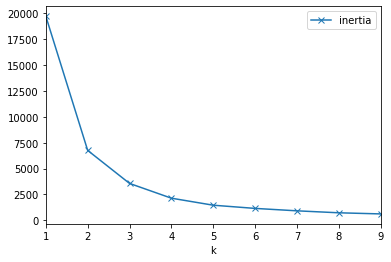

In [5]:
df.plot(y='inertia', x='k', marker='x')

In [6]:
kmeans = KMeans(n_clusters=2).fit(df_tip[input_features])

df_tip['cluster2'] = kmeans.labels_
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size,cluster2
1,16.99,1.01,Female,No,Sun,Dinner,2,0
2,10.34,1.66,Male,No,Sun,Dinner,3,0
3,21.01,3.50,Male,No,Sun,Dinner,3,0
4,23.68,3.31,Male,No,Sun,Dinner,2,1
5,24.59,3.61,Female,No,Sun,Dinner,4,1


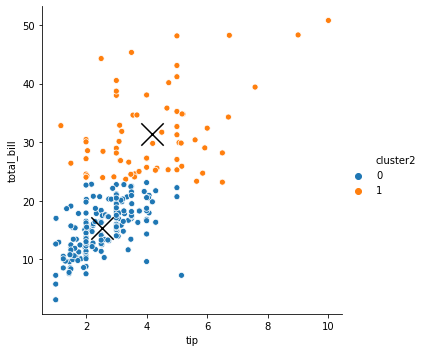

In [96]:
sns.relplot(data=df_tip, y='total_bill', x='tip', hue='cluster2')
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='x', s=500, c='black')

In [98]:
kmeans = KMeans(n_clusters=3).fit(df_tip[input_features])

df_tip['cluster3'] = kmeans.labels_
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size,cluster3,cluster2
1,16.99,1.01,Female,No,Sun,Dinner,2,1,0
2,10.34,1.66,Male,No,Sun,Dinner,3,1,0
3,21.01,3.50,Male,No,Sun,Dinner,3,0,0
4,23.68,3.31,Male,No,Sun,Dinner,2,0,1
5,24.59,3.61,Female,No,Sun,Dinner,4,0,1


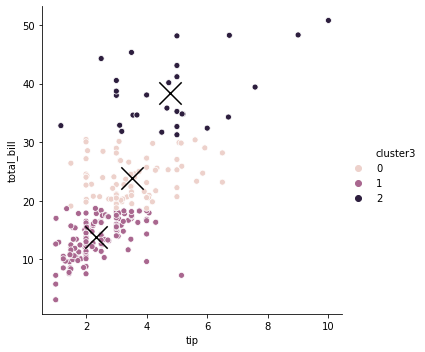

In [99]:
sns.relplot(data=df_tip, y='total_bill', x='tip', hue='cluster3')
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='x', s=500, c='black')

In [16]:
X

,total_bill,tip,size
1,16.99,1.01,2
2,10.34,1.66,3
3,21.01,3.50,3
4,23.68,3.31,2
5,24.59,3.61,4
6,25.29,4.71,4
7,8.77,2.00,2
8,26.88,3.12,4
9,15.04,1.96,2
10,14.78,3.23,2


In [7]:
X = df_tip[['total_bill', 'tip', 'size']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(kmeans.cluster_centers_)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

[[13.15565574  2.25270492  2.09836066]
 [36.71628571  4.602       3.71428571]
 [22.27252874  3.39862069  2.77011494]]


[Text(0.5, 0, 'size'), Text(0.5, 0, 'tip'), Text(0.5, 0, 'total_bill')]

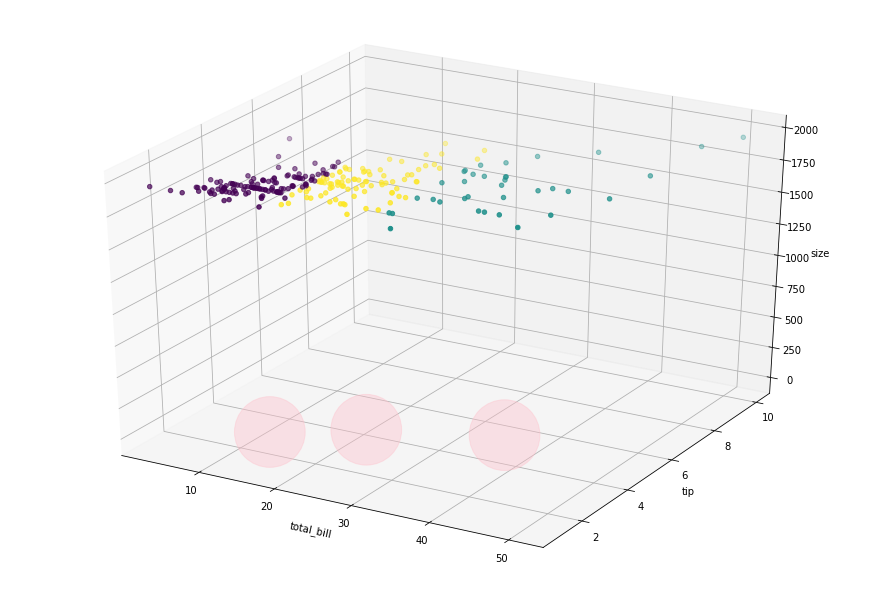

In [8]:
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)

ax.scatter(df_tip.total_bill, df_tip.tip, df_tip.size, c=kmeans.labels_)
ax.scatter(centers.total_bill, centers.tip, centers.size, c='pink', s=5000, alpha=.4)
ax.set(xlabel='total_bill', ylabel='tip', zlabel='size')

In [9]:
centers

,total_bill,tip,size
0,13.155656,2.252705,2.098361
1,36.716286,4.602000,3.714286
2,22.272529,3.398621,2.770115
